# Kraskov-Stogbauer-Grassberger MI estimator + base distributions showcase

In [1]:
import numpy as np

In [2]:
np.random.seed(42)

In [3]:
# Use Kraskov-Stogbauer-Grassberger MI estimator to run example tests.
from mutinfo.estimators.knn import KSG
from mutinfo.estimators.base import JointTransform
from sklearn.preprocessing import RobustScaler

estimator = KSG(preprocessor=JointTransform([RobustScaler(), RobustScaler()]))

In [4]:
from utils.plots import *
from utils.tests import *

In [5]:
font = {'size' : 16}
matplotlib.rc('font', **font)

In [6]:
from mutinfo.distributions.base import CorrelatedNormal, CorrelatedStudent, CorrelatedUniform, LogGammaExponential, SmoothedUniform, UniformlyQuantized

In [7]:
MI_grid = np.linspace(0.0, 10.0, 11)
n_samples = 10000
n_runs = 100

X_dim = 2
Y_dim = 3 # Ignored if the distribution does not support unequal dimensionality.

## Correlated normal distribution

In [8]:
estimated_MI = run_tests(
    lambda mutual_information : CorrelatedNormal(mutual_information, X_dim, Y_dim),
    estimator=estimator,
    MI_grid=MI_grid,
    n_samples=n_samples,
    n_runs=n_runs
)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [04:50<00:00, 26.41s/it]


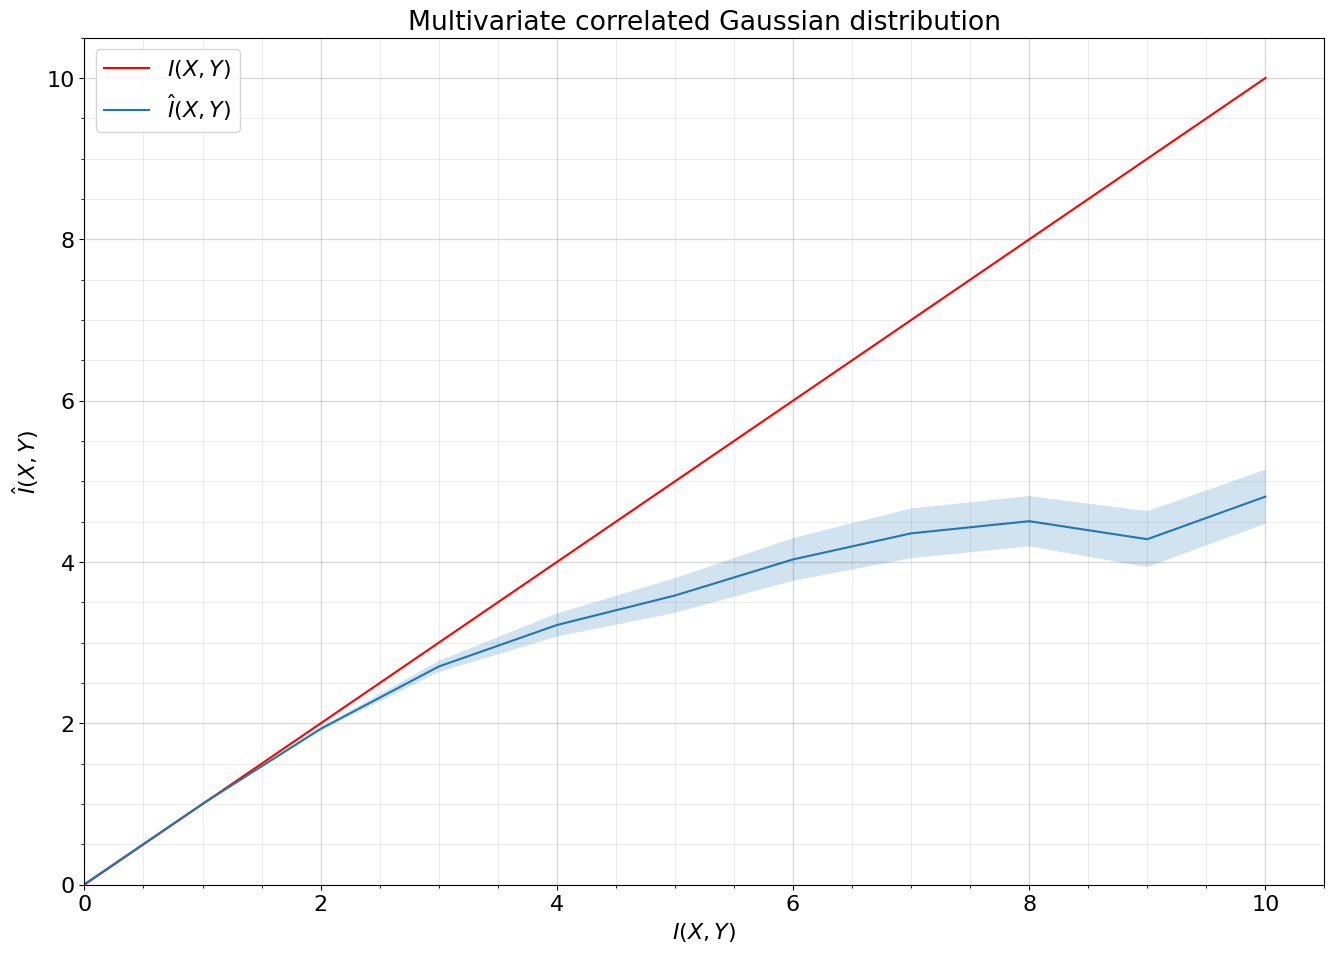

In [9]:
plot_estimated_MI(MI_grid, estimated_MI, "Multivariate correlated Gaussian distribution")

## Correlated uniform distribution

In [10]:
estimated_MI = run_tests(
    lambda mutual_information : CorrelatedUniform(mutual_information, X_dim, Y_dim),
    estimator=estimator,
    MI_grid=MI_grid,
    n_samples=n_samples,
    n_runs=n_runs
)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [04:32<00:00, 24.80s/it]


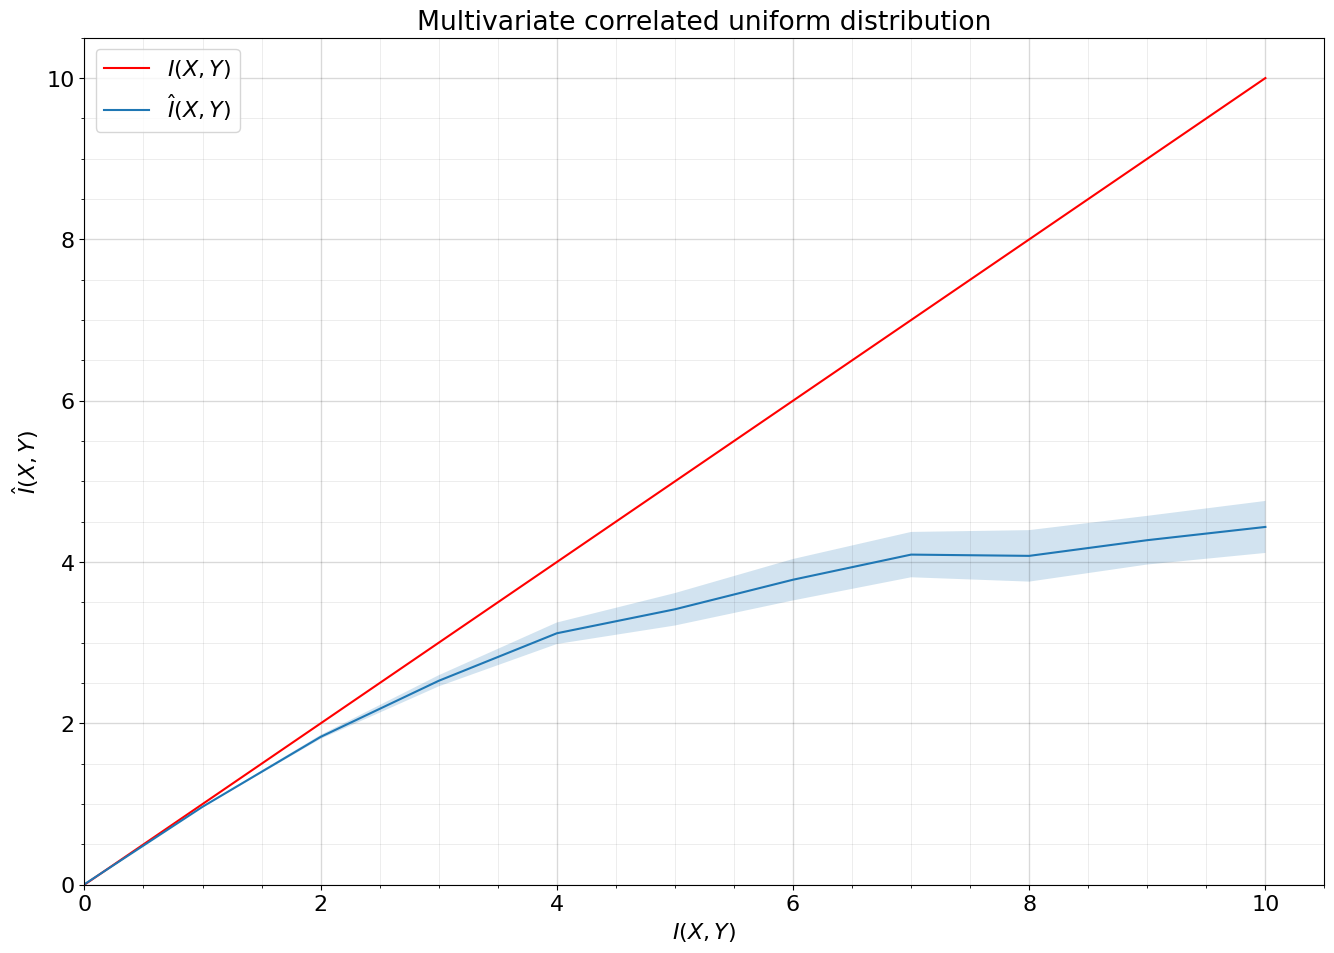

In [11]:
plot_estimated_MI(MI_grid, estimated_MI, "Multivariate correlated uniform distribution")

## Correlated Student's distribution

In [12]:
degrees_of_freedom = 1

In [13]:
estimated_MI = run_tests(
    lambda mutual_information : CorrelatedStudent(mutual_information, X_dim, Y_dim, degrees_of_freedom),
    estimator=estimator,
    MI_grid=MI_grid[1:],
    n_samples=n_samples,
    n_runs=n_runs
)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [04:34<00:00, 27.40s/it]


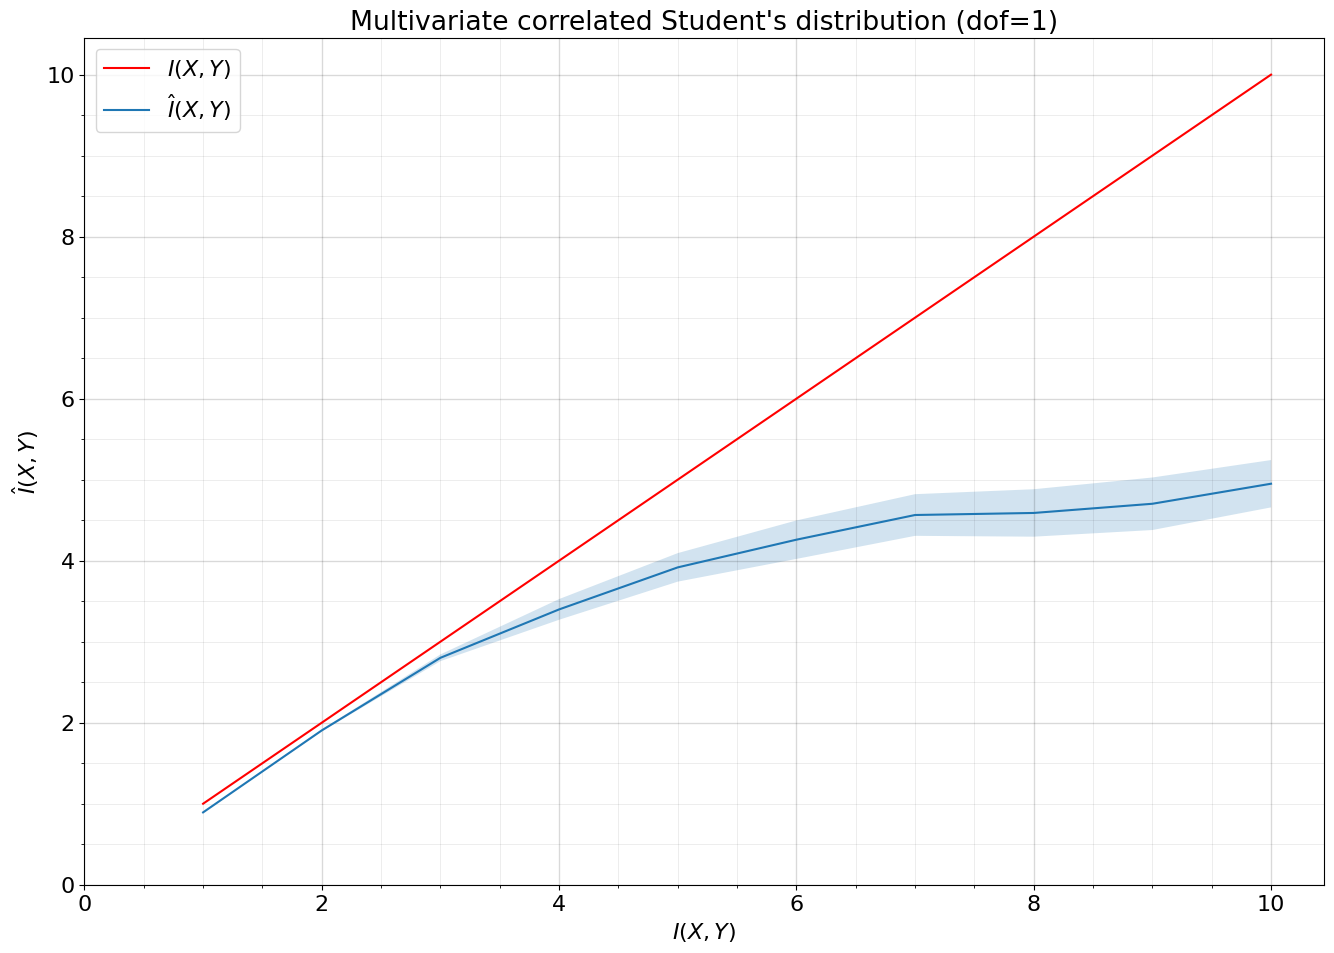

In [14]:
plot_estimated_MI(MI_grid[1:], estimated_MI, f"Multivariate correlated Student's distribution (dof={degrees_of_freedom})")

## Smoothed uniform distribution

In [15]:
estimated_MI = run_tests(
    lambda mutual_information : SmoothedUniform(mutual_information, X_dim),
    estimator=estimator,
    MI_grid=MI_grid,
    n_samples=n_samples,
    n_runs=n_runs
)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [02:37<00:00, 14.36s/it]


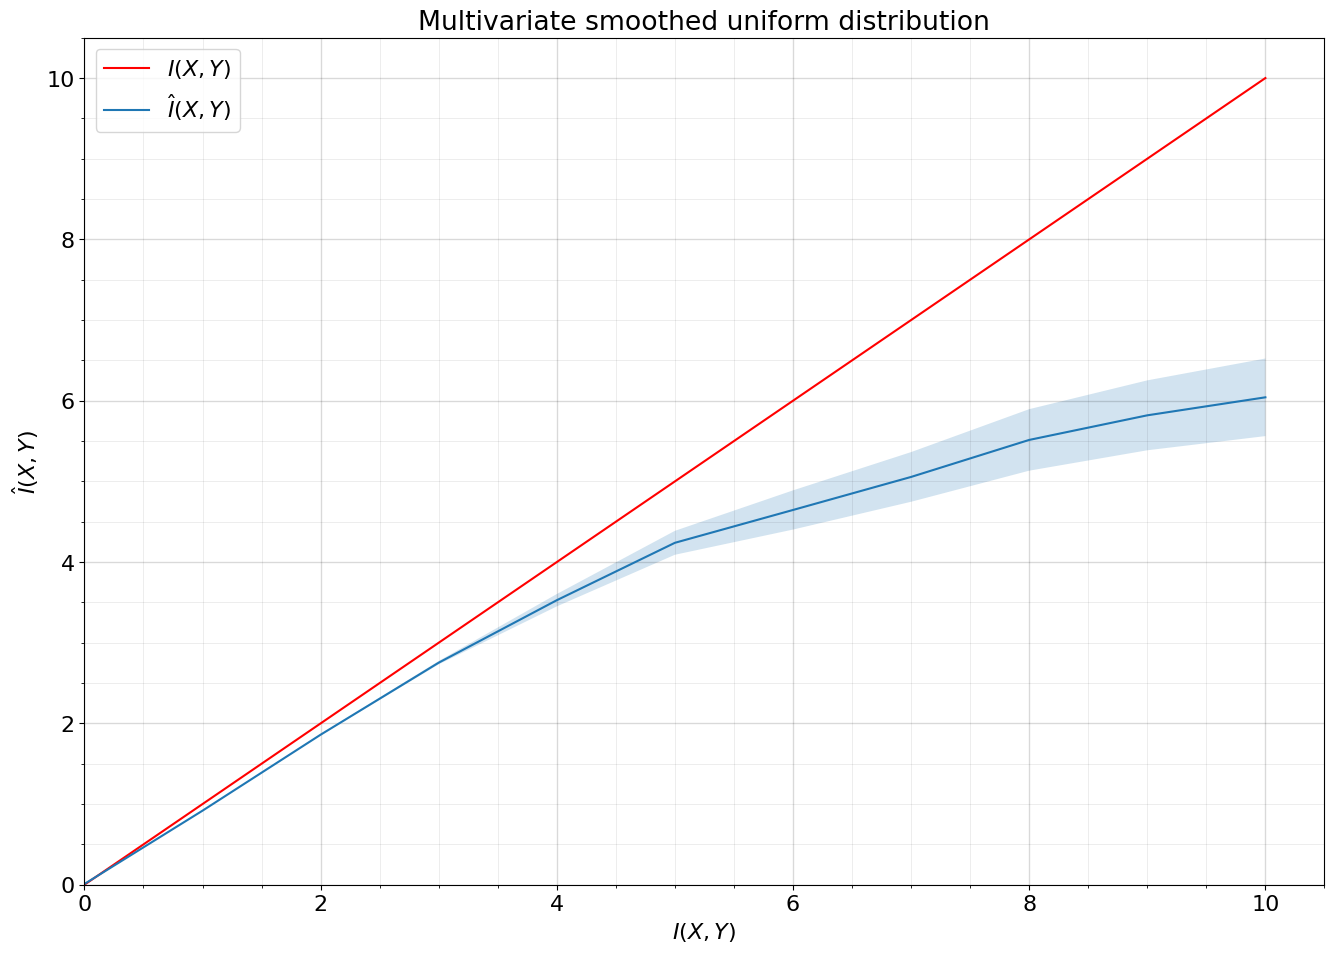

In [16]:
plot_estimated_MI(MI_grid, estimated_MI, f"Multivariate smoothed uniform distribution")

## Gamma-exponential distribution

In [17]:
estimated_MI = run_tests(
    lambda mutual_information : LogGammaExponential(mutual_information, X_dim),
    estimator=estimator,
    MI_grid=MI_grid,
    n_samples=n_samples,
    n_runs=n_runs
)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [02:29<00:00, 13.60s/it]


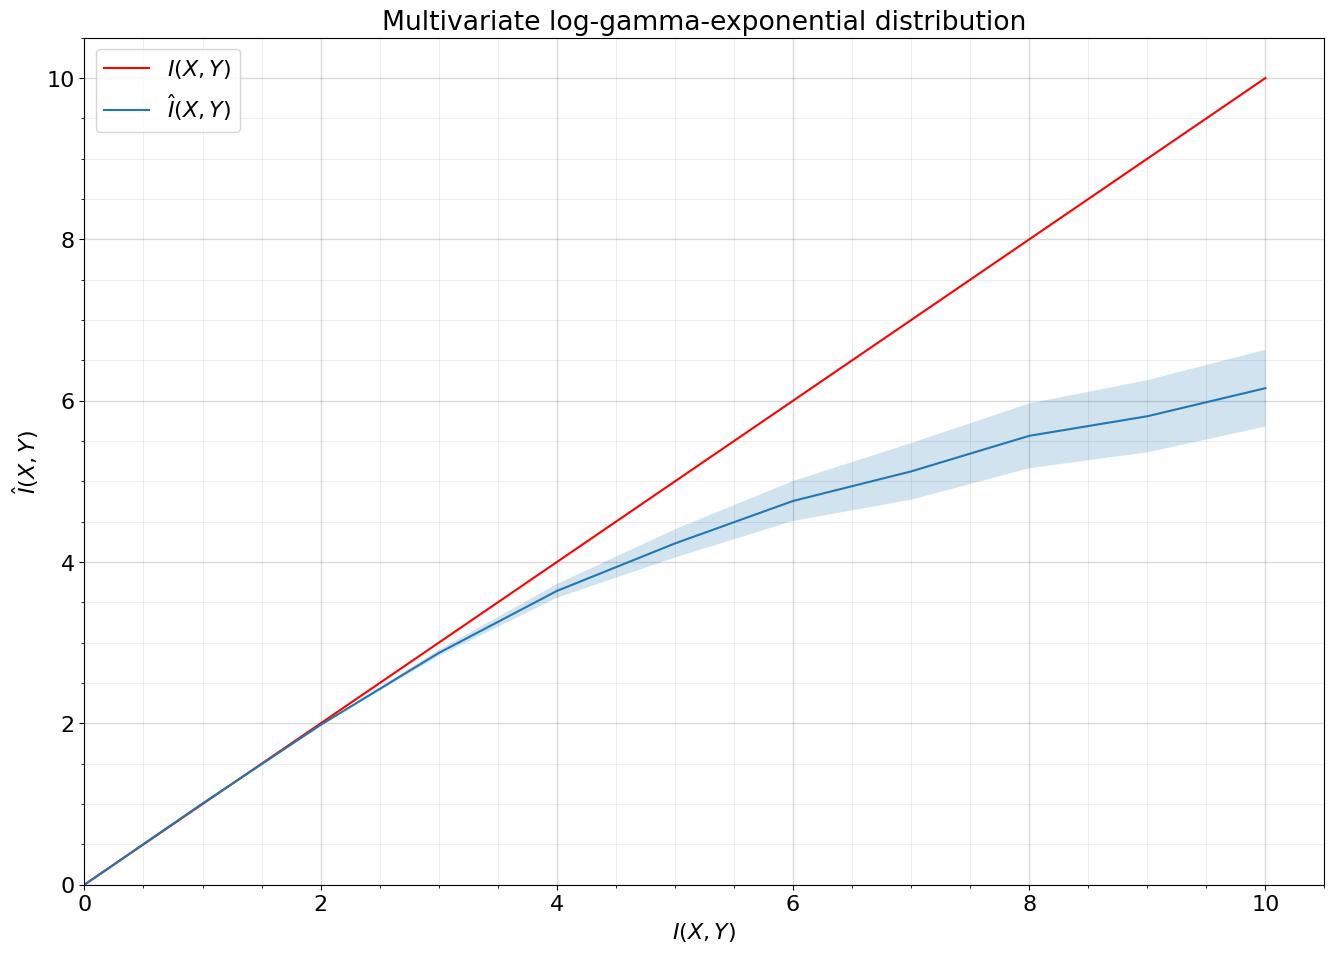

In [18]:
plot_estimated_MI(MI_grid, estimated_MI, f"Multivariate log-gamma-exponential distribution")

## Quantized normal distribution

In [19]:
from scipy.stats import norm

estimated_MI = run_tests(
    lambda mutual_information : UniformlyQuantized(mutual_information, X_dim, norm(loc=0.0, scale=1.0)),
    estimator=estimator,
    MI_grid=MI_grid,
    n_samples=n_samples,
    n_runs=n_runs
)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [02:41<00:00, 14.70s/it]


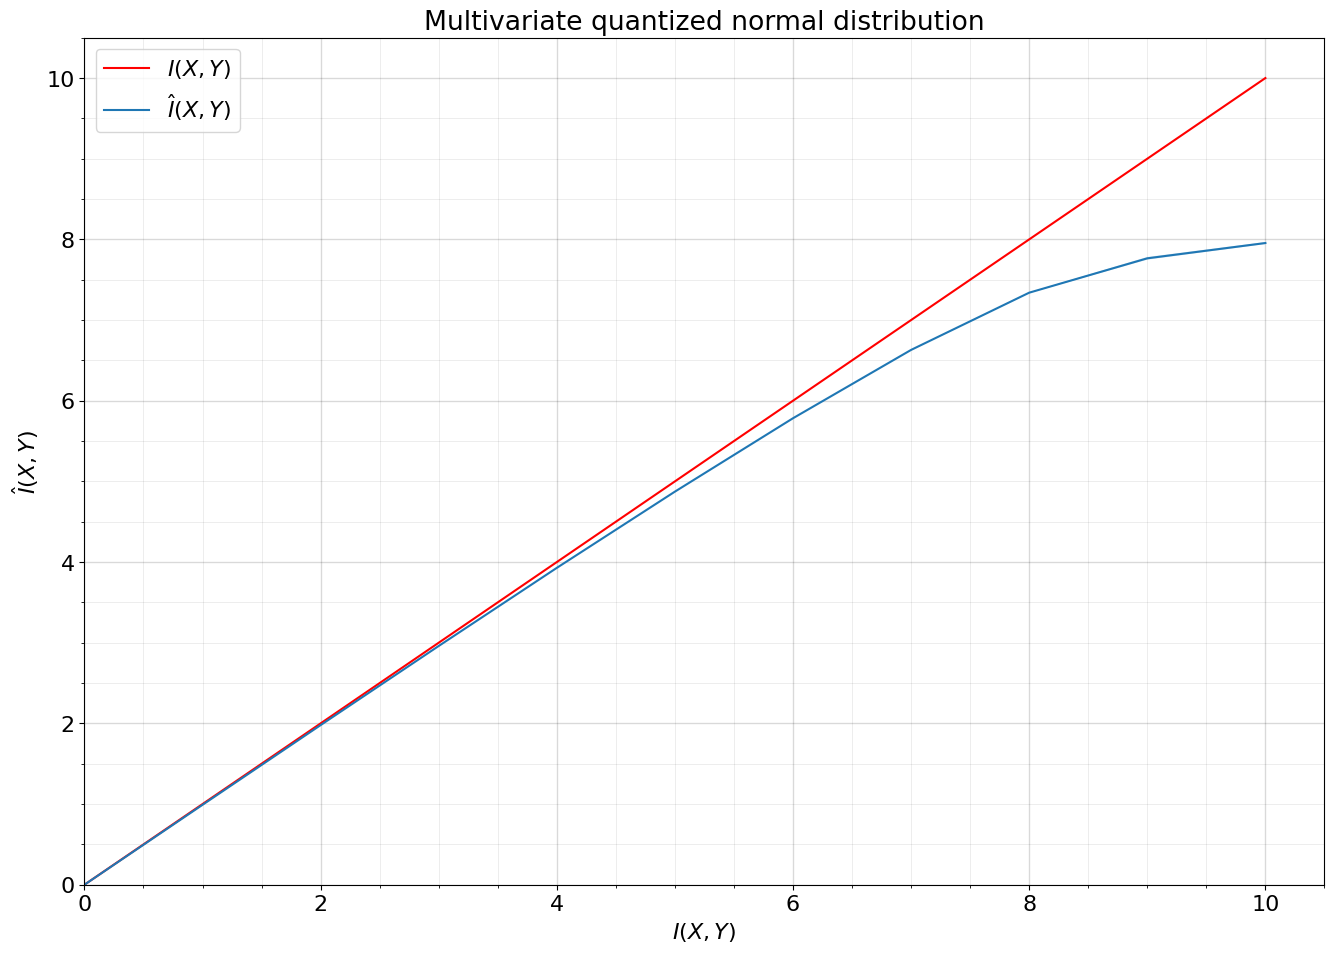

In [20]:
plot_estimated_MI(MI_grid, estimated_MI, f"Multivariate quantized normal distribution")